# Rakuten Data Exploration

## 1- Importing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

sns.set()

In [2]:
df_X = pd.read_csv('./datasets/X_train_update.csv', index_col = 0)

print("nb_entries, nb_columns = ", df_X.shape)
display(df_X.head())

nb_entries, nb_columns =  (84916, 4)


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [3]:
df_y = pd.read_csv('./datasets/Y_train_CVw08PX.csv', index_col = 0)

print(print("nb_entries, nb_columns = ", df_y.shape))
display(df_y.head())

nb_entries, nb_columns =  (84916, 1)
None


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


## 2- Variables descriptive analysis
* Variable types, role (feature/target), nature (cathegorical/quantitative).  
* Percentage of missing values  
* Distribution of values for quantitative variables: Statistical description.  
* Relevant cathegories of Cathegorical variables.  

### Text data Features: Datatypes & missing values

In [4]:
## Let's see the variable types
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


In [5]:
## Check the amount of missing values in the 'description' variable

nb_missingDescr = df_X['description'].isna().sum()

print(f'There are {nb_missingDescr} ({round(nb_missingDescr/df_X.shape[0]*100,2)} %) elements without a description')

There are 29800 (35.09 %) elements without a description


### Text data - Feature Engineering: LENGHTS

In [6]:
## Let's measure the length for variables 'designation' and 'description'

## feature engineering:
df_X['designation_len'] = [len(title) for title in df_X['designation'] ]
df_X['description_len'] = [len(text) if pd.notnull(text) else 0 for text in df_X['description'] ]

df_X.head()

,designation,description,productid,imageid,designation_len,description_len
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,88,0
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,206,0
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,76,760
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,63,0
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,20,213


### Text data: Descriptive Statistics on LENGHTS

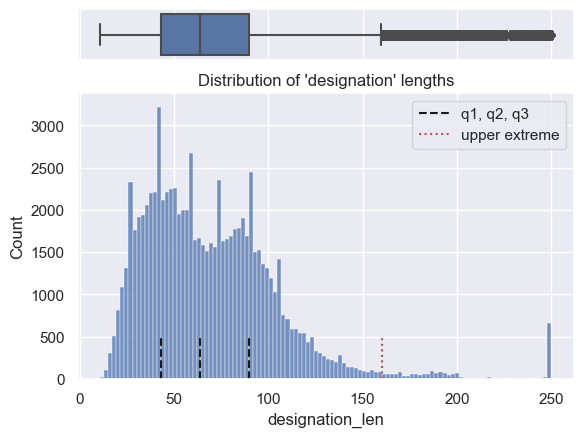

In [7]:
## Length distribtion for variable 'designation' 

# quantile values
q1, q2, q3 = df_X['designation_len'].quantile(q=[0.25,0.5,0.75])
iqr = q3-q1

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
plt.title("Distribution of 'designation' lengths")

## Box plot
sns.boxplot(x = df_X.designation_len, ax = ax_box)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## hist plot
sns.histplot(x = df_X.designation_len, ax = ax_hist)#, kde = True

# add quantiles and extreme values markers
ax_hist.axvline(x=q1, ymin= 0, ymax = 0.15, c='k', ls = '--', label='q1, q2, q3')
ax_hist.axvline(x=q2, ymin= 0, ymax = 0.15, c='k', ls = '--')
ax_hist.axvline(x=q3, ymin= 0, ymax = 0.15, c='k', ls = '--')
ax_hist.axvline(x=q3+1.5*iqr, ymin= 0, ymax = 0.15, c='r', ls = ':', label='upper extreme')

ax_hist.legend()
plt.show()

In [8]:
##descriptive statistics
df_X['designation_len'].describe()

count    84916.000000
mean        70.163303
std         36.793383
min         11.000000
25%         43.000000
50%         64.000000
75%         90.000000
max        250.000000
Name: designation_len, dtype: float64

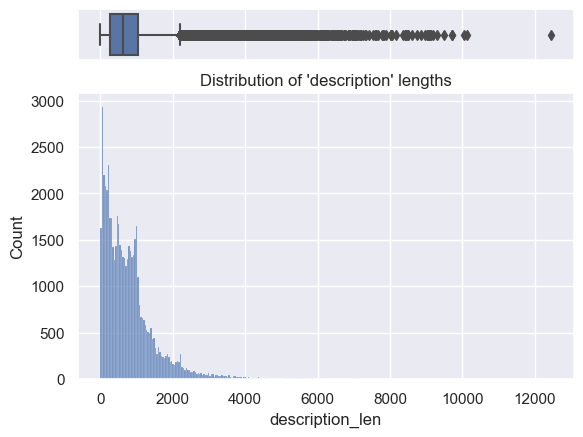

In [9]:
## length distribution for exsiting variables 'description' 

## filter entris with an existing description
df_X_description = df_X[ df_X['description_len'] != 0 ]


fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={"height_ratios":(.15,.85)})
plt.title("Distribution of 'description' lengths")

## Box plot (outliers)
sns.boxplot(x = df_X_description.description_len, ax = ax_box)
ax_box.set(xlabel='')

## hist plot
sns.histplot(x = df_X_description['description_len'], ax = ax_hist);

In [10]:
##descriptive statistics
df_X_description['description_len'].describe()

count    55116.000000
mean       808.171692
std        805.462153
min          1.000000
25%        259.000000
50%        626.000000
75%       1034.000000
max      12451.000000
Name: description_len, dtype: float64

### Data Normality test: QQ plot

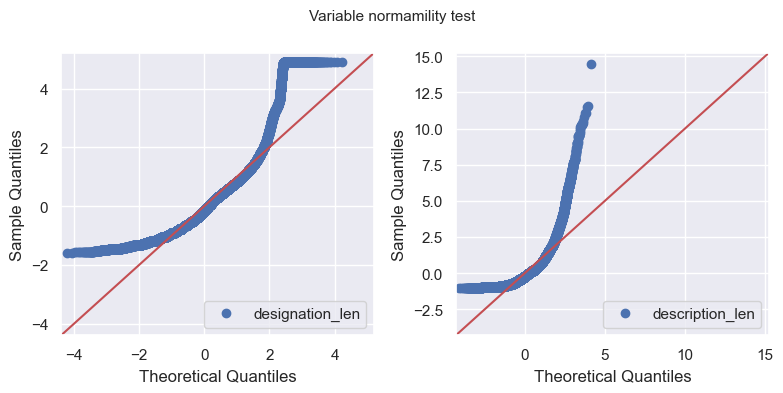

In [135]:
import statsmodels.api as sm

# plt.figure(figsize = (12,6)) 

# plt.subplot(2,1,1)
# sample1 = df_X['designation_len']
# sm.qqplot(sample1, fit=True, line='45', label ='designation_len')
# plt.legend()

# plt.subplot(2,1,2)
# sample2 = df_X_description['description_len']
# sm.qqplot(sample2, fit=True, line='45', label ='description_len')
# plt.legend();


figure, axs = plt.subplots(1, 2, figsize=(8,4))
figure.suptitle('Variable normamility test', fontsize=11) #, fontweight='bold'

sm.qqplot(df_X['designation_len'], ax = axs[0], fit=True, line='45', label ='designation_len')
axs[0].legend(loc ='lower right')

sm.qqplot(df_X_description['description_len'], ax = axs[1], fit=True, line='45', label ='description_len')
axs[1].legend(loc ='lower right')

plt.tight_layout()
plt.show()

### Target variable: Product type code

In [11]:
## unique categories represented in the training dataset
df_y['prdtypecode'].unique().shape[0]

27

In [12]:
## most represented product type codes
df_y.value_counts().head(10)

prdtypecode
2583           10209
1560            5073
1300            5045
2060            4993
2522            4989
1280            4870
2403            4774
2280            4760
1920            4303
1160            3953
dtype: int64

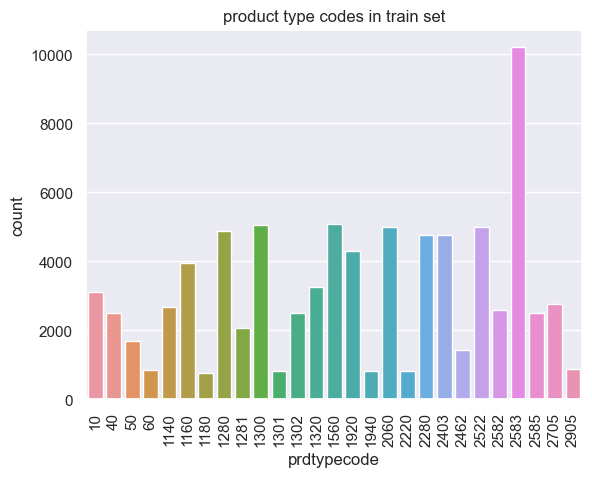

In [13]:
## Counts per cathegory in the whole train dataset.

sns.countplot(x = df_y.prdtypecode)
plt.xticks(rotation = 90)
plt.title('product type codes in train set')
plt.show()

In [14]:
print(f'The Dominant cathegory has prdtypecode {2583}, with about 10k items.')

The Dominant cathegory has prdtypecode 2583, with about 10k items.


In [60]:
## Some exmaples of the most represented class:

cat2583 = df_X[ df_y.prdtypecode == 2583]
cat2583[['designation','description']].head()
#cat2583.head()

,designation,description,productid,imageid,designation_len,description_len
20,Kit de désinfection pour piscines enfants 20990,NaN,3936362802,1268740880,47,0
39,Bouée gonflable River tube - OOGARDEN,Bouée gonflable River tube en PVC idéale pour ...,3147314797,1225887302,37,325
53,Testeur électronique de pH,Utilisation du Testeur électronique de pHGrâce...,207151480,941622055,26,541
58,Pompe de filtration Speck Badu 95,NaN,4128438373,1295960377,33,0
64,AstralCom 1 CV Mono de DAB - Surpresseur piscine,Tension (V) : Monophasé - 230 V Puissance : 1...,1857269337,1105831362,48,108


### Loading some images of the most represented category

./datasets/image_train/image_1268740880_product_3936362802.jpg
(500, 500, 3)


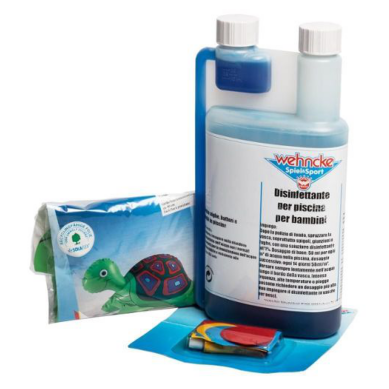

In [23]:
im_idx = 20

file = "./datasets/image_train/image_"+str(cat2583.loc[im_idx,'imageid'])+"_product_"+str(cat2583.loc[im_idx,'productid'])+".jpg"
print(file)
image = cv2.imread(file)
image = np.int64(image)
print(image.shape)

_ = plt.imshow(image[:,:,::-1])
_ = plt.axis("off")

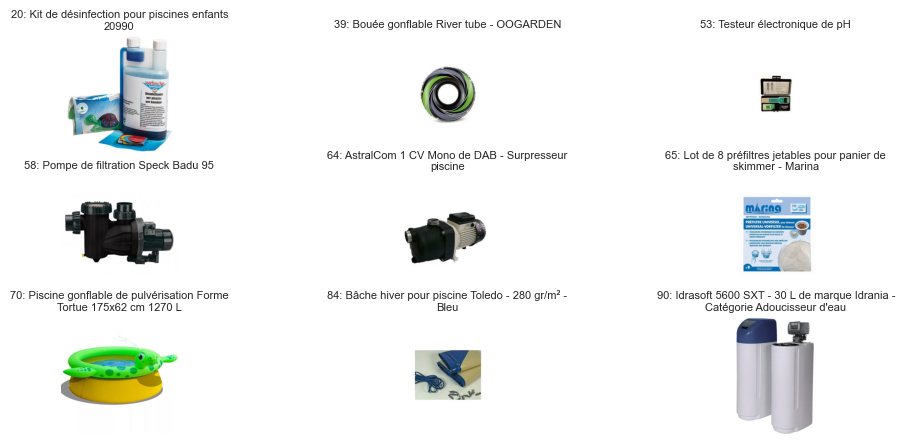

In [59]:
nb_items = 9

fig = plt.figure(figsize=(12, 7))

columns = 3
rows = len( cat2583.head(nb_items).index ) //columns + 1
path = "./datasets/image_train/image_"

for i,idx in enumerate(cat2583.head(nb_items).index):
    file = path + str(cat2583.loc[idx,'imageid'])+"_product_"+str(cat2583.loc[idx,'productid'])+".jpg"
    
    img = cv2.imread(file)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img[:,:,::-1])
    plt.axis("off")
    #plt.title(str(idx)+": "+cat2583.loc[idx,'designation'], size=8, wrap = True)
    plt.title("\n".join(wrap( str(idx)+": "+cat2583.loc[idx,'designation'], 50)), size=8, wrap = True)
    
plt.show()


**Distribution of product designation lenght for cat 2583**

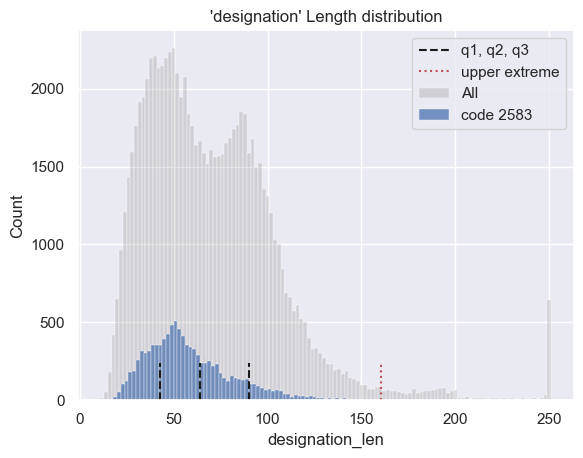

In [102]:
## Length distribtion for variable 'designation' 

plt.title("'designation' Length distribution")

## hist plot
bin_width = 2
sns.histplot(x = 'designation_len', data = df_X, color='grey', binwidth = bin_width, label = 'All', alpha = 0.25)
sns.histplot(x = 'designation_len', data = cat2583, binwidth = bin_width, label = 'code 2583')

# add quantiles and extreme values markers
plt.axvline(x=q1, ymin= 0, ymax = 0.1, c='k', ls = '--', label='q1, q2, q3')
plt.axvline(x=q2, ymin= 0, ymax = 0.1, c='k', ls = '--')
plt.axvline(x=q3, ymin= 0, ymax = 0.1, c='k', ls = '--')
plt.axvline(x=q3+1.5*iqr, ymin= 0, ymax = 0.1, c='r', ls = ':', label='upper extreme')

plt.legend()
plt.show()

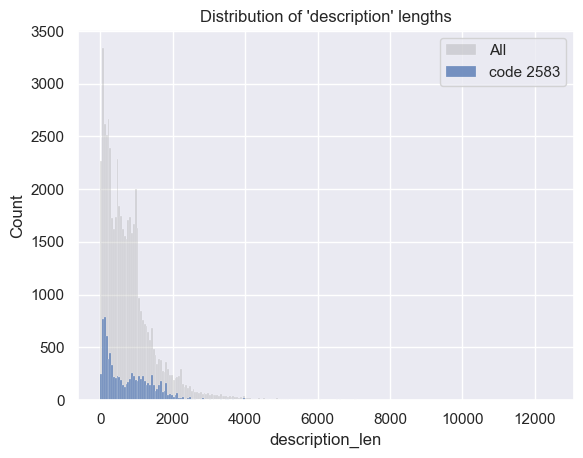

In [81]:
## length distribution for exsiting variables 'description' 

## filter entris with an existing description
#df_X_description = df_X[ df_X['description_len'] != 0 ]


plt.title("Distribution of 'description' lengths")

## hist plot
bin_width = 50
sns.histplot(x = 'description_len', data = df_X_description, \
             binwidth = bin_width, color = 'grey', alpha = 0.25, label = 'All')
sns.histplot(x = 'description_len', data = cat2583[ cat2583['description_len'] != 0 ], \
             binwidth = bin_width, label = 'code 2583')
plt.legend();        

### Correlations

**Is there a correlation between desigantion_len (numerical) and prdtypecode (categorical) ??**  
* Lets plot a boxplot for each category
* Let's run an ANOVA test to check

In [138]:
## merge dataframe on indexes
df_data = pd.merge(df_y,df_X,left_index = True, right_index = True)
print(df_data.shape)
display(df_data.head())


(84916, 7)


,prdtypecode,designation,description,productid,imageid,designation_len,description_len
0,10,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,88,0
1,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,206,0
2,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,76,760
3,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,63,0
4,2705,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,20,213


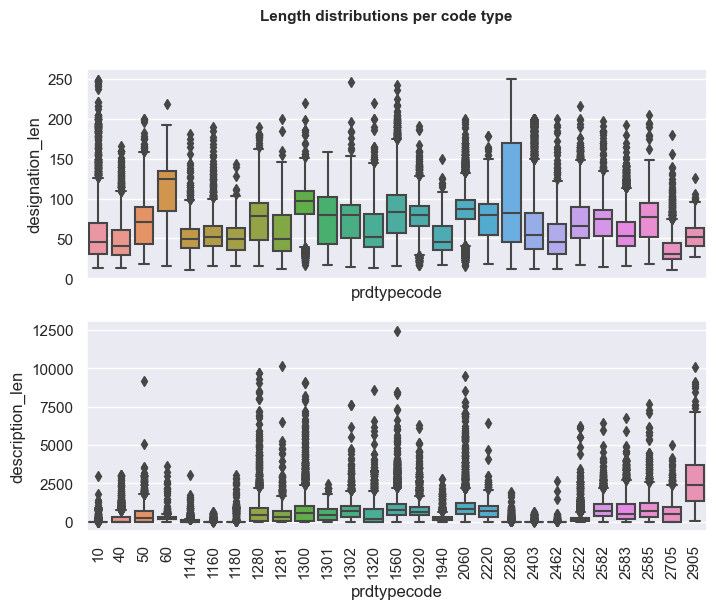

In [190]:
## Box plot
figure, axs = plt.subplots(2, 1, figsize=(8,6))
figure.suptitle('Length distributions per code type', fontsize=11, fontweight='bold')

sns.boxplot(x = 'prdtypecode', y ='designation_len', data = df_data, ax = axs[0])#, kind = 'box', height=4, aspect=2
axs[0].set_xticks([])

sns.boxplot(x = 'prdtypecode', y ='description_len', data = df_data, ax = axs[1])
plt.xticks(rotation = 90);


## It seems that the type of distribution, the symmetry, the amount of extreme values, depends on the product type code.
## Notice for example products type code 2220 (balanced) vs products type code 10 (skewed).

**We can make an hyphoteses and imagine that there are certain type of products for which the description or designation is simpler, so the description is shorter. Hence make the hypothesys that there is a correlation**